<a href="https://colab.research.google.com/github/dsreliete/Womakerscode-DA-desafio_squad/blob/main/Desafio3SquadMaryJackson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
from scipy.stats import norm

## **Desafio 1: Entendendo o consumidor.**

A base de dados: desafio_01_consumidor.csv cont√©m informa√ß√µes de seus clientes (anonimizados) no per√≠odo pr√© e p√≥s pandemia. A coluna "pr√©-pandemia" indica se o dado √© pr√©-pandemia ou n√£o, sendo 1, caso positivo ou 0 caso negativo.

In [ ]:
url = "https://raw.githubusercontent.com/dsreliete/Womakerscode-DA-desafio_squad/main/desafio01consumidor.csv"
df_consumidor = pd.read_csv(url)
df_consumidor

id_cliente  idade  renda      produto     regiao-BR  pre-pandemia
0    XXXXXXX72     30   7452        batom       Sudeste             1
1    XXXXXXX15     59    837  desodorante      Nordeste             1
2    XXXXXXX70     28   3231       sombra  Centro-Oeste             1
3    XXXXXXX99     27   5409        batom           Sul             1
4    XXXXXXX98     24   1142        batom       Sudeste             1
..         ...    ...    ...          ...           ...           ...
198  XXXXXXX25     46  16918  desodorante           Sul             0
199  XXXXXXX50     43  10930  antissinais         Norte             0
200  XXXXXXX65     48  10246      perfume      Nordeste             0
201  XXXXXXX61     47  12337        batom       Sudeste             0
202  XXXXXXX89     58  14108  desodorante           Sul             0

[203 rows x 6 columns]

In [ ]:
df_consumidor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_cliente    203 non-null    object
 1   idade         203 non-null    int64 
 2   renda         203 non-null    int64 
 3   produto       203 non-null    object
 4   regiao-BR     203 non-null    object
 5   pre-pandemia  203 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 9.6+ KB


1. Entenda a distribui√ß√£o de vari√°veis como de idade / renda / regiao / produtos mais comprados antes e depois da pandemia.


a. Identifique as distribui√ß√µes

In [ ]:
#c√≥pia do dataframe para n√£o alterar o original
df_clientes = df_consumidor.copy()

In [ ]:
df_clientes['pandemia'] = df_consumidor['pre-pandemia'].map({1: 'Pr√©', 0: 'P√≥s'})
df_clientes

id_cliente  idade  renda      produto     regiao-BR  pre-pandemia pandemia
0    XXXXXXX72     30   7452        batom       Sudeste             1      Pr√©
1    XXXXXXX15     59    837  desodorante      Nordeste             1      Pr√©
2    XXXXXXX70     28   3231       sombra  Centro-Oeste             1      Pr√©
3    XXXXXXX99     27   5409        batom           Sul             1      Pr√©
4    XXXXXXX98     24   1142        batom       Sudeste             1      Pr√©
..         ...    ...    ...          ...           ...           ...      ...
198  XXXXXXX25     46  16918  desodorante           Sul             0      P√≥s
199  XXXXXXX50     43  10930  antissinais         Norte             0      P√≥s
200  XXXXXXX65     48  10246      perfume      Nordeste             0      P√≥s
201  XXXXXXX61     47  12337        batom       Sudeste             0      P√≥s
202  XXXXXXX89     58  14108  desodorante           Sul             0      P√≥s

[203 rows x 7 columns]

In [ ]:
#distribui√ß√£o de idade
distribuicao_idade = df_clientes.groupby(['pandemia'])['idade'].describe()
print("Distribui√ß√£o por Idade:")
print(distribuicao_idade)

Distribui√ß√£o por Idade:
          count       mean        std   min    25%   50%    75%   max
pandemia                                                             
Pr√©       101.0  39.881188  15.016183  16.0  28.00  37.0  48.00  80.0
P√≥s       102.0  44.901961  13.373174  15.0  35.25  46.0  54.75  77.0


In [ ]:
#distribui√ß√£o de renda
distribuicao_renda = df_clientes.groupby(['pandemia'])['renda'].describe()
print("Distribui√ß√£o por Renda:")
print(distribuicao_renda)

Distribui√ß√£o por Renda:
          count          mean          std     min      25%      50%  \
pandemia                                                               
Pr√©       101.0   9180.643564  6007.677720   110.0   4867.0   7488.0   
P√≥s       102.0  13968.500000  5641.384444  1995.0  10255.0  13380.5   

               75%      max  
pandemia                     
Pr√©       13226.00  24090.0  
P√≥s       16870.25  30000.0  


In [ ]:
#distribui√ß√£o de regi√£o
distribuicao_regiao = df_clientes.groupby(['pandemia'])['regiao-BR'].describe()
print("Distribui√ß√£o por Regi√£o:")
print(distribuicao_regiao)

Distribui√ß√£o por Regi√£o:
         count unique  top freq
pandemia                       
Pr√©        101      5  Sul   29
P√≥s        102      5  Sul   42


In [ ]:
#distribui√ß√£o de produto
distribuicao_produto = df_clientes.groupby(['pandemia'])['produto'].describe()
print("Distribui√ß√£o por Produto:")
print(distribuicao_produto)

Distribui√ß√£o por Produto:
         count unique          top freq
pandemia                               
Pr√©        101      6        batom   61
P√≥s        102      6  desodorante   46


b. Plote histogramas / boxplots

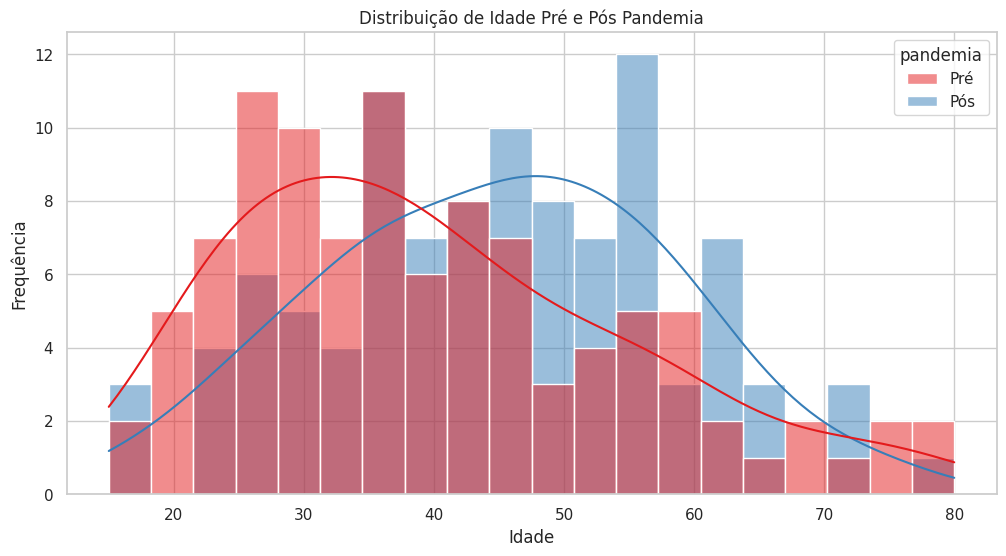

In [ ]:
#histograma de idade
sns.set(style='whitegrid')

plt.figure(figsize=(12, 6))
sns.histplot(data=df_clientes, x='idade', hue='pandemia', kde=True, bins=20, palette='Set1')
plt.title('Distribui√ß√£o de Idade Pr√© e P√≥s Pandemia')
plt.xlabel('Idade')
plt.ylabel('Frequ√™ncia')
plt.show()

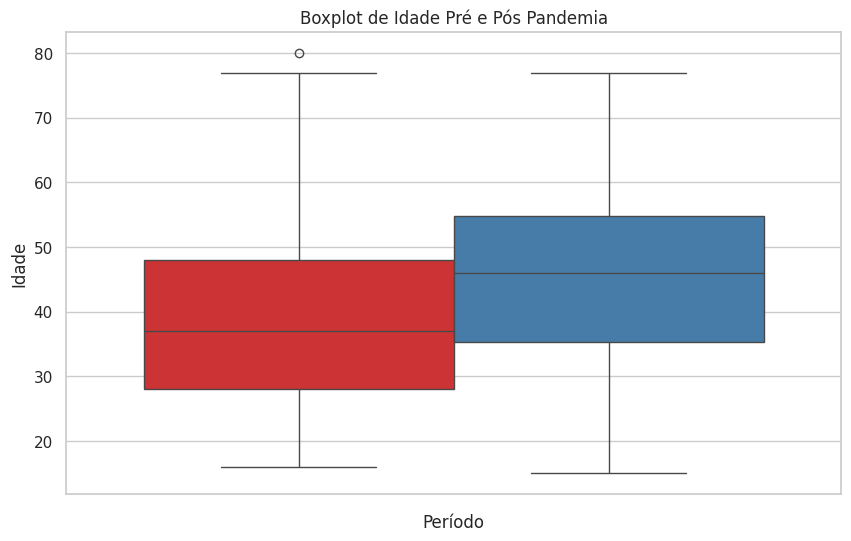

In [ ]:
#boxplot de idade
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clientes, hue='pandemia', y='idade', palette='Set1', legend=False)
plt.title('Boxplot de Idade Pr√© e P√≥s Pandemia')
plt.xlabel('Per√≠odo')
plt.ylabel('Idade')
plt.show()

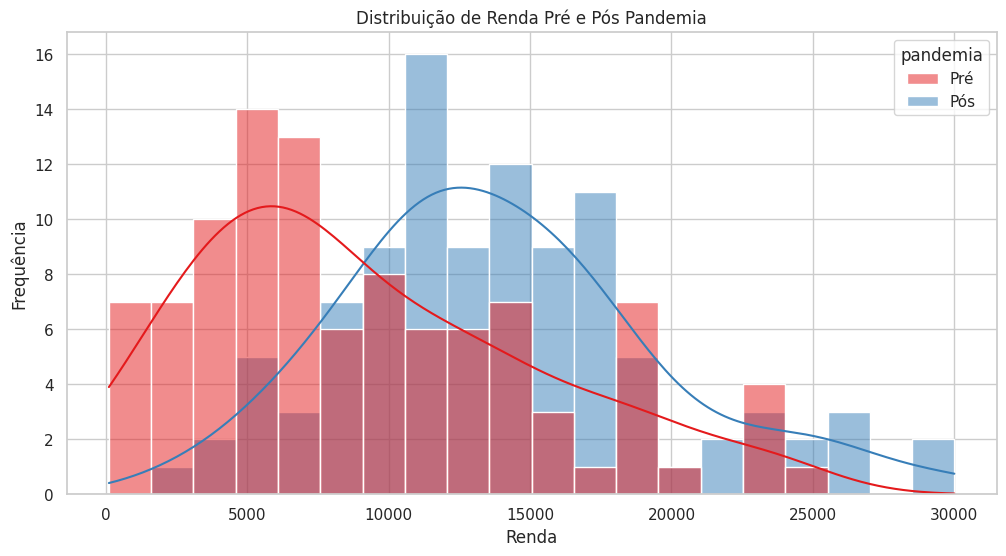

In [ ]:
#histograma de renda
sns.set(style='whitegrid')

plt.figure(figsize=(12, 6))
sns.histplot(data=df_clientes, x='renda', hue='pandemia', kde=True, bins=20, palette='Set1')
plt.title('Distribui√ß√£o de Renda Pr√© e P√≥s Pandemia')
plt.xlabel('Renda')
plt.ylabel('Frequ√™ncia')
plt.show()

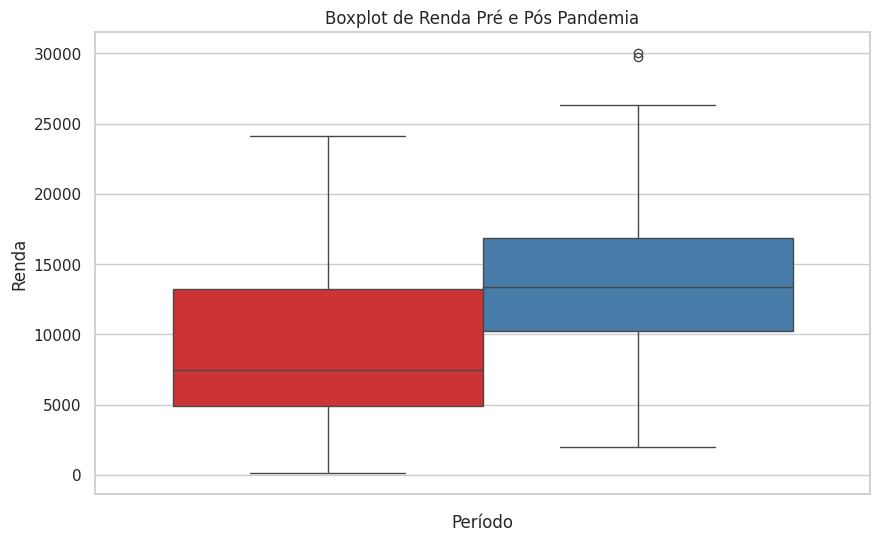

In [ ]:
#boxplot de renda
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clientes, hue='pandemia', y='renda', palette='Set1', legend=False)
plt.title('Boxplot de Renda Pr√© e P√≥s Pandemia')
plt.xlabel('Per√≠odo')
plt.ylabel('Renda')
plt.show()

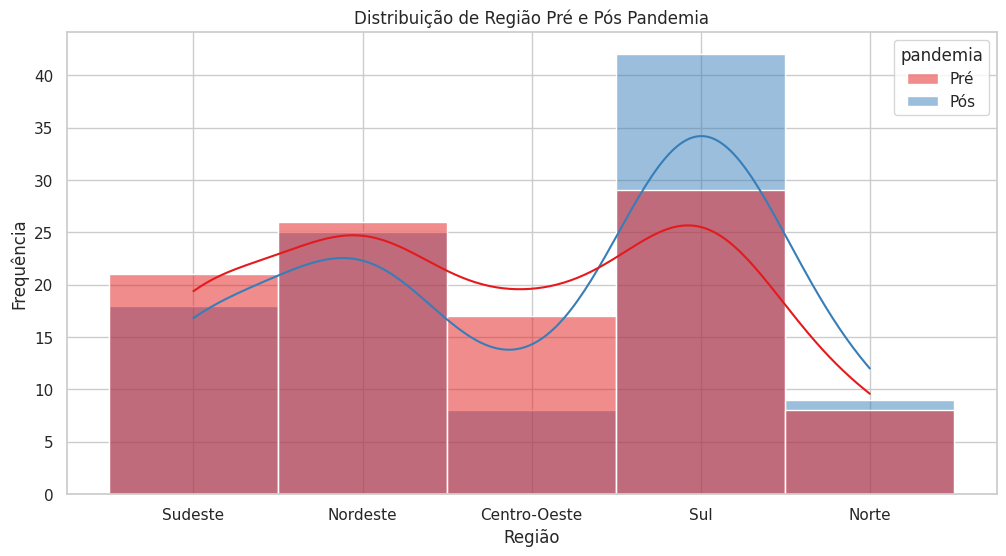

In [ ]:
#histograma de regi√£o
sns.set(style='whitegrid')

plt.figure(figsize=(12, 6))
sns.histplot(data=df_clientes, x='regiao-BR', hue='pandemia', kde=True, bins=20, palette='Set1')
plt.title('Distribui√ß√£o de Regi√£o Pr√© e P√≥s Pandemia')
plt.xlabel('Regi√£o')
plt.ylabel('Frequ√™ncia')
plt.show()

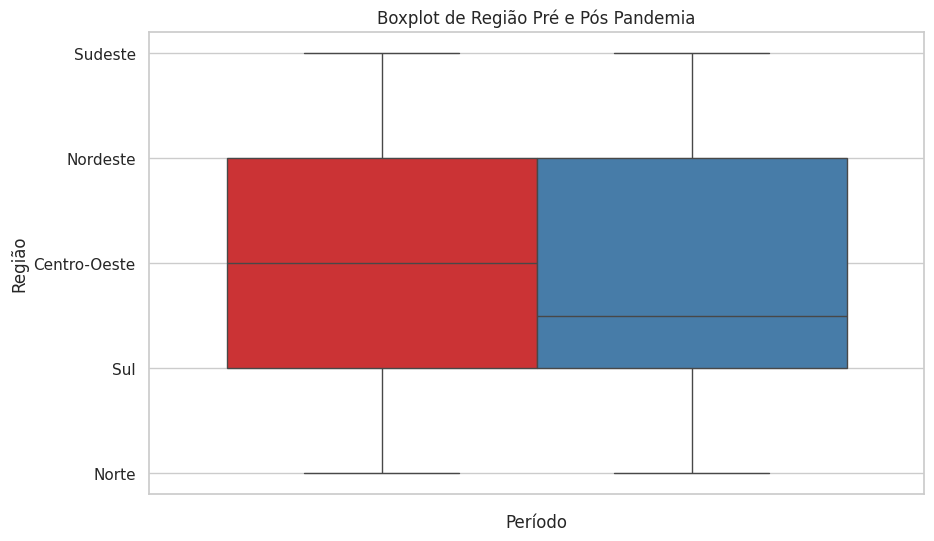

In [ ]:
#boxplot de regi√£o
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clientes, hue='pandemia', y='regiao-BR', palette='Set1', legend=False)
plt.title('Boxplot de Regi√£o Pr√© e P√≥s Pandemia')
plt.xlabel('Per√≠odo')
plt.ylabel('Regi√£o')
plt.show()

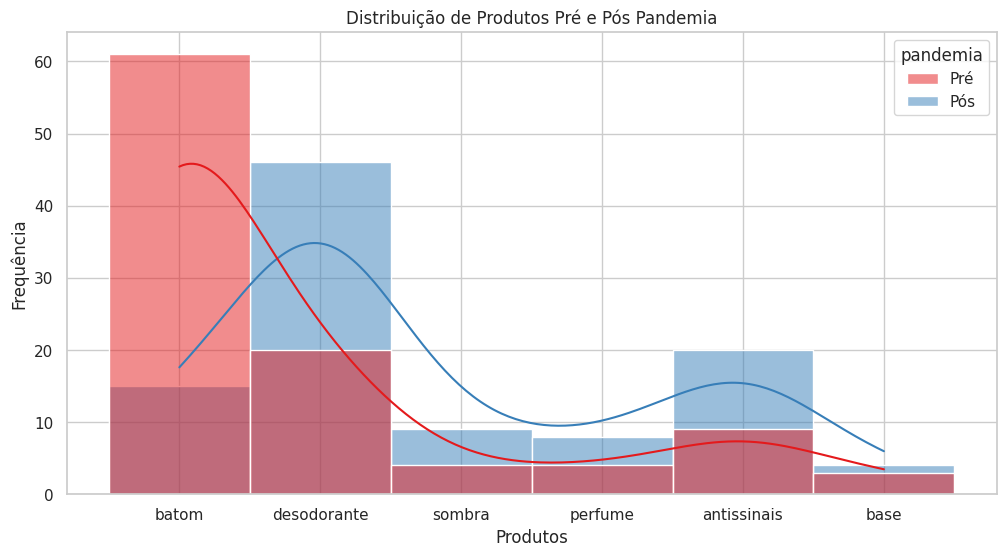

In [ ]:
#histograma de produto
sns.set(style='whitegrid')

plt.figure(figsize=(12, 6))
sns.histplot(data=df_clientes, x='produto', hue='pandemia', kde=True, bins=20, palette='Set1')
plt.title('Distribui√ß√£o de Produtos Pr√© e P√≥s Pandemia')
plt.xlabel('Produtos')
plt.ylabel('Frequ√™ncia')
plt.show()

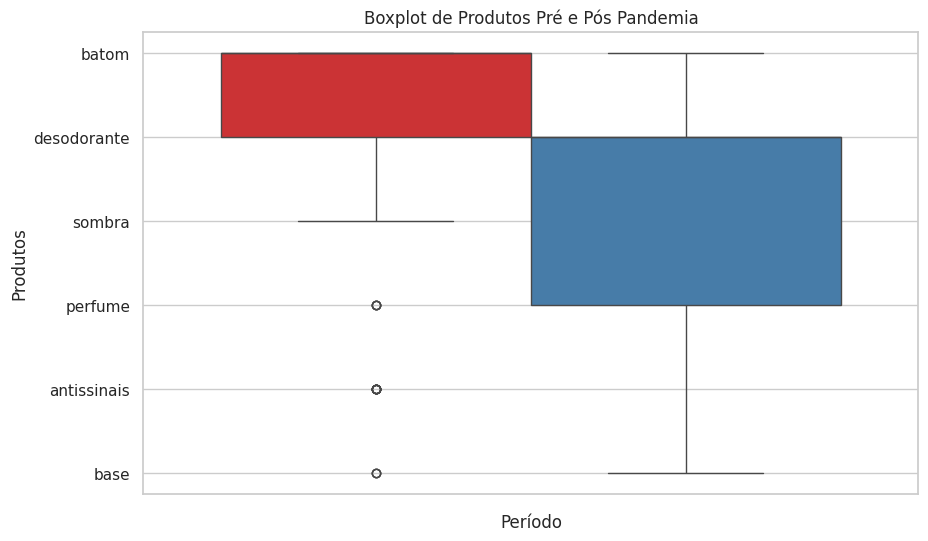

In [ ]:
#boxplot de produto
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clientes, hue='pandemia', y='produto', palette='Set1', legend=False)
plt.title('Boxplot de Produtos Pr√© e P√≥s Pandemia')
plt.xlabel('Per√≠odo')
plt.ylabel('Produtos')
plt.show()

2. Voc√™ notou diferen√ßas n√≠tidas pr√© e p√≥s pandemia? Como voc√™ poderia provar estatisticamente que essas diferen√ßas s√£o significativas ? (pergunta extra)


In [ ]:
# Produtos mais comprados pr√© e p√≥s pandemia

labels = {1: 'Pr√©-Pandemia', 0: 'P√≥s-Pandemia'}

# pd.crosstab(): Cria uma tabela cruzada que mostra a contagem de cada
# produto em rela√ß√£o √†s categorias "Pr√©-Pandemia" e "P√≥s-Pandemia".
status_prod = pd.crosstab(
    df_consumidor['produto'],
    df_consumidor['pre-pandemia'],
    rownames = [ 'Produtos'],
    colnames = [ 'Categoria']
)

# status_prod.rename(): Renomeia as colunas usando o dicion√°rio labels
# para substituir 1 por "Pr√©-Pandemia" e 0 por "P√≥s-Pandemia".
status_prod.rename(columns = labels, inplace = True)
status_prod

Categoria    P√≥s-Pandemia  Pr√©-Pandemia
Produtos                               
antissinais            20             9
base                    4             3
batom                  15            61
desodorante            46            20
perfume                 8             4
sombra                  9             4

In [ ]:
# C√°lculo do percentual de crescimento dos produtos

# status_prod['P√≥s-Pandemia'] - status_prod['Pr√©-Pandemia']: Subtrai as contagens de produtos comprados "Pr√©-Pandemia" das
# contagens "P√≥s-Pandemia". Isso d√° a diferen√ßa,  ou seja, o aumento ou diminui√ß√£o do n√∫mero de compras de cada produto ap√≥s a pandemia.
# / status_prod['Pr√©-Pandemia']: Divide essa diferen√ßa pela contagem "Pr√©-Pandemia" para calcular a propor√ß√£o do crescimento (ou redu√ß√£o).
# * 100: Multiplica o valor pela constante 100 para obter o percentual de crescimento.
# round(..., 2): Arredonda o valor final para duas casas decimais, para deixar o resultado mais leg√≠vel.

porcentagem = round((status_prod['P√≥s-Pandemia'] - status_prod['Pr√©-Pandemia'])  / status_prod['Pr√©-Pandemia'] * 100, 2)
porcentagem

Produtos
antissinais    122.22
base            33.33
batom          -75.41
desodorante    130.00
perfume        100.00
sombra         125.00
dtype: float64

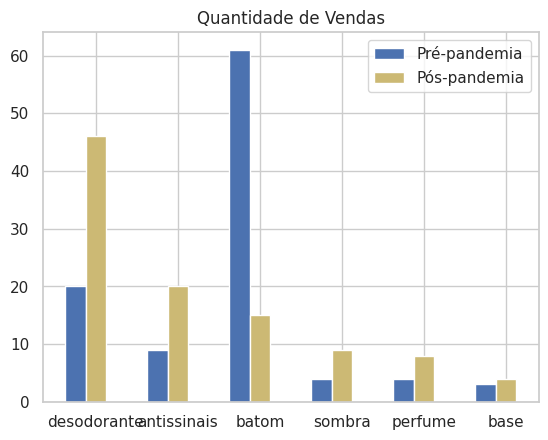

In [ ]:
# gr√°fico ilustrativo dos produtos

# Quantidade de vendas para o Produto A
valores_produto_pre = [20, 9, 61, 4, 4, 3]

# Quantidade de vendas para o Produto B
valores_produto_pos = [46, 20, 15, 9, 8, 4]

# Cria eixo x para produto A e produto B com uma separa√ß√£o de 0.25 entre as barras
x1 =  np.arange(len(valores_produto_pre))
x2 = [x + 0.25 for x in x1]

# Plota as barras
plt.bar(x1, valores_produto_pre, width=0.25, label = 'Pr√©-pandemia', color = 'b')
plt.bar(x2, valores_produto_pos, width=0.25, label = 'P√≥s-pandemia', color = 'y')

# Coloca o nome dos produtos como label do eixo x
meses = ['desodorante', 'antissinais', 'batom', 'sombra', 'perfume', 'base']
plt.xticks([x + 0.25 for x in range(len(valores_produto_pre))], meses)

# Inseri uma legenda no gr√°fico
plt.legend()

plt.title("Quantidade de Vendas")
plt.show()

3. Suponha agora que os dados recebidos s√£o somente uma amostra da sua popula√ß√£o total de clientes. Suponha que a sua "popula√ß√£o" de clientes verdadeira √© de 100000. Qual o tamanho da amostra necess√°ria para chegarmos a conclus√µes com 95% de confian√ßa e 2% de margem de erro? A base informada √© suficiente? E com uma margem de erro de 10%?

In [ ]:
n_amostra = len(df_consumidor)
print(f"O tamanho da amostra √©: {n_amostra}")

O tamanho da amostra √©: 203


In [ ]:
import math
from scipy.stats import norm

def calcular_tamanho_amostra(populacao_total, nivel_confianca, margem_erro, proporcao_estimada=0.5):
    # Calcular o valor cr√≠tico Z para o n√≠vel de confian√ßa
    Z = norm.ppf(1 - (1 - nivel_confianca) / 2)

    # Calcular o tamanho da amostra para popula√ß√£o infinita
    n = (Z**2 * proporcao_estimada * (1 - proporcao_estimada)) / (margem_erro**2)

    # Ajustar para a popula√ß√£o finita
    n_ajustado = n / (1 + (n / populacao_total))

    return math.ceil(n_ajustado)  # Arredondar para o pr√≥ximo n√∫mero inteiro

# Par√¢metros
populacao_total = 100000
nivel_confianca = 0.95
proporcao_estimada = 0.5

# Margem de erro de 2%
margem_erro_2 = 0.02
tamanho_amostra_2 = calcular_tamanho_amostra(populacao_total, nivel_confianca, margem_erro_2, proporcao_estimada)
print(f"Tamanho da amostra necess√°rio com 95% de confian√ßa e 2% de margem de erro: {tamanho_amostra_2}")

# Margem de erro de 10%
margem_erro_10 = 0.10
tamanho_amostra_10 = calcular_tamanho_amostra(populacao_total, nivel_confianca, margem_erro_10, proporcao_estimada)
print(f"Tamanho da amostra necess√°rio com 95% de confian√ßa e 10% de margem de erro: {tamanho_amostra_10}")

# Verificar se a amostra atual √© suficiente
amostra_atual = 203
print(f"Tamanho da amostra atual: {amostra_atual}")

if amostra_atual >= tamanho_amostra_2:
    print("A amostra atual √© suficiente para uma margem de erro de 2% com 95% de confian√ßa.")
else:
    print("A amostra atual N√ÉO √© suficiente para uma margem de erro de 2% com 95% de confian√ßa.")

if amostra_atual >= tamanho_amostra_10:
    print("A amostra atual √© suficiente para uma margem de erro de 10% com 95% de confian√ßa.")
else:
    print("A amostra atual N√ÉO √© suficiente para uma margem de erro de 10% com 95% de confian√ßa.")

Tamanho da amostra necess√°rio com 95% de confian√ßa e 2% de margem de erro: 2345
Tamanho da amostra necess√°rio com 95% de confian√ßa e 10% de margem de erro: 96
Tamanho da amostra atual: 203
A amostra atual N√ÉO √© suficiente para uma margem de erro de 2% com 95% de confian√ßa.
A amostra atual √© suficiente para uma margem de erro de 10% com 95% de confian√ßa.


## **Desafio 2: Determinando o Estoque de Seguran√ßa.**

In [ ]:
url = "https://raw.githubusercontent.com/dsreliete/Womakerscode-DA-desafio_squad/main/desafio_02_estoque.csv"
df_estoque = pd.read_csv(url)
df_estoque.head()

data  vendas-iogurte  lead-time
0  2015-01-04            5083          4
1  2015-01-11            4936          3
2  2015-01-18            5051          6
3  2015-01-25            4846          4
4  2015-02-01            5003          5

In [ ]:
df_estoque.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   data            370 non-null    object
 1   vendas-iogurte  370 non-null    int64 
 2   lead-time       370 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 8.8+ KB


In [ ]:
df_estoque['data'] = pd.to_datetime(df_estoque['data'])
df_estoque.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   data            370 non-null    datetime64[ns]
 1   vendas-iogurte  370 non-null    int64         
 2   lead-time       370 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 8.8 KB


**1**. Analise os dados das vendas e do lead time. Eles seguem uma distribui√ß√£o normal? Que caracter√≠sticas voc√™ identificou para chegar a essa conclus√£o?

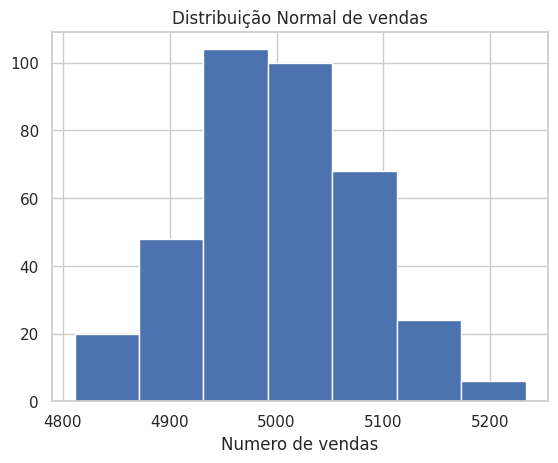

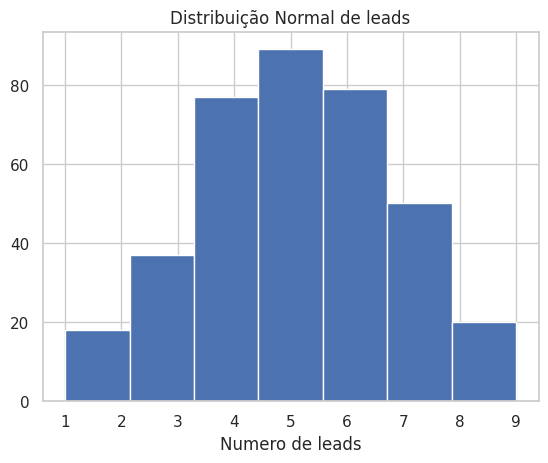

Pela geometria dos graficos √© possivel concluir que o grafico de leads tem uma distribui√ß√£o mais linear do que a de vendas mas as duas apresentaram distribui√ß√µes normais.


In [ ]:
plt.hist(df_estoque['vendas-iogurte'], bins=7)
plt.title('Distribui√ß√£o Normal de vendas')
plt.xlabel('Numero de vendas')
plt.grid(True)
plt.show()

plt.hist(df_estoque['lead-time'], bins=7)
plt.title('Distribui√ß√£o Normal de leads')
plt.xlabel('Numero de leads')
plt.grid(True)
plt.show()

print('Pela geometria dos graficos √© possivel concluir que o grafico de leads tem uma distribui√ß√£o mais linear do que a de vendas mas as duas apresentaram distribui√ß√µes normais.')

**2**. Assuma que:

*   a. Os dados seguem uma distribui√ß√£o normal.
*   b. O time de vendas utilize para o produto em quest√£o o n√≠vel de servi√ßo
de 99,87%
*   c. O produto n√£o tem sazonalidade (todos os meses vende valores
pr√≥ximos) e a demanda m√©dia passada √© uma boa estimativa para a projetada, de acordo com o time de planejamento de demanda.

Calcule, com os dados fornecidos, o estoque de seguran√ßa desejado.

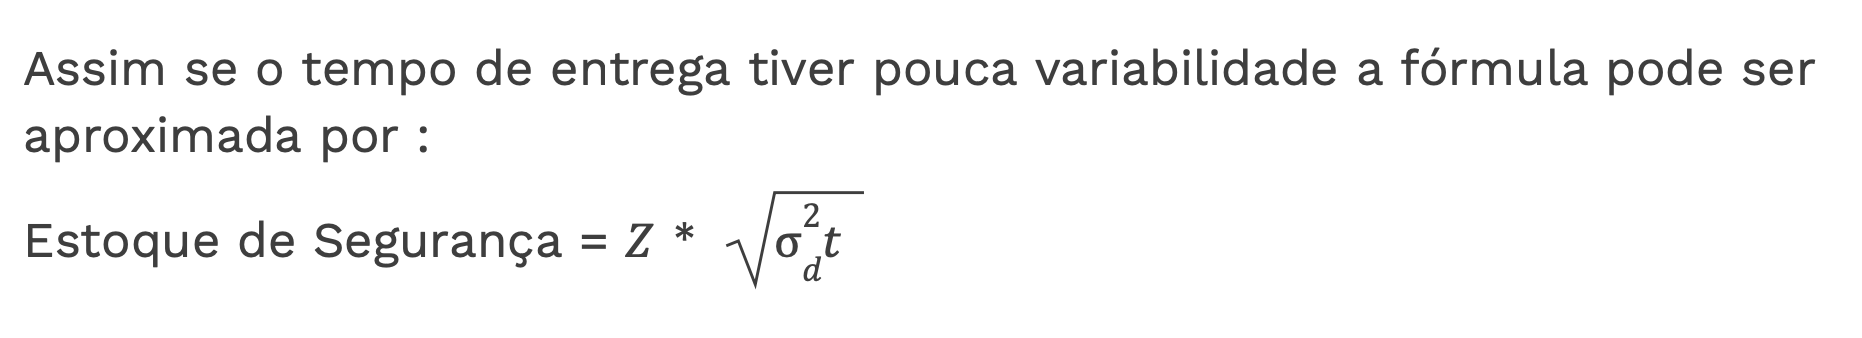

In [ ]:
# Z = o valor da tabela da distribui√ß√£o normal, que indica a quantos desvios padr√µes ao redor da m√©dia temos que tomar para cobrir a propor√ß√£o da √°rea sob a curva normal /n√≠vel de servi√ßo desejado.

# œÉùëë = desvio padr√£o / varia√ß√£o da demanda

# t = lead time m√©dio.

z_score = stats.norm.ppf(0.9987)

demand_std = df_estoque['vendas-iogurte'].std()
demand_mean = df_estoque['vendas-iogurte'].mean()

lead_time_std = df_estoque['lead-time'].std()
lead_time_mean = df_estoque['lead-time'].mean()

safety_stock = z_score * demand_std * np.sqrt(lead_time_mean)
print(f'O estoque de seguran√ßa desejado √© de {math.ceil(safety_stock)}')

O estoque de seguran√ßa desejado √© de 526


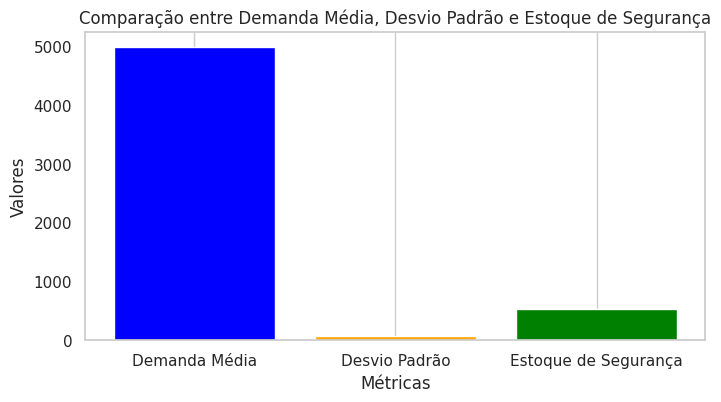

In [ ]:
# Preparar os dados para o gr√°fico
labels = ['Demanda M√©dia', 'Desvio Padr√£o', 'Estoque de Seguran√ßa']
values = [demand_mean, demand_std, safety_stock]

# Criar o gr√°fico de barras
plt.figure(figsize=(8, 4))
plt.bar(labels, values, color=['blue', 'orange', 'green'])
plt.title('Compara√ß√£o entre Demanda M√©dia, Desvio Padr√£o e Estoque de Seguran√ßa')
plt.ylabel('Valores')
plt.xlabel('M√©tricas')
plt.grid(axis='y')

# Mostrar o gr√°fico
plt.show()